# Analyzing the Stroop Effect
<hr>

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. 

The task has two conditions: a congruent words condition, and an incongruent words condition. In the **congruent words condition**, the words being displayed are color words whose names match the colors in which they are printed: 

![Congruent Words](word-set1.png "Congruent Words")

In the **incongruent words condition**, the words displayed are color words whose names do not match the colors in which they are printed:

![Congruent Words](word-set2.png "Congruent Words")

In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

## Analysis
<hr>

### Variables 

**Independent variable**: A congruent words condition, and an incongruent words condition.

**Dependent variable**: The time it takes a person to name the ink colors for each condition.

### Hypothesis 

**H0 (Null Hypothesis)**: 

`μ_congruent = μ_incongruent`  
There is no difference in the time required to read the color for congruent words and time required to read the color of the incongruent word.

**HA (Alternative Hypothesis)**: 

`μ_congruent ≠ μ_incongruent`  
There is a difference in the time required to read the color for congruent words and the time required to read the color of the incongruent word.

### Hypothesis test

**Two-tailed depended T-Test**  
Since we measure participants on the same depended variable (the time it takes to name the ink color of the world) under two different conditions (a congruent words condition, and an incongruent words condition) I will perform a two-tailed depended t-test. The dependent t-test compares the means of two related groups when participants are measured on the same depended variable under two different conditions in order to determine whether there is a statistically significant difference between these means.

### Descriptive statistics

In [1]:
# load data
import pandas as pd
df = pd.read_csv('stroopdata.csv')

In [2]:
# display few lines
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [3]:
# basic statistics 
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


This dataset contains 24 results for congruent and incongruent conditions. A mean value for the congruent condition is 14.05, while the mean value for the incongruent condition is 22.01. Median is 14.36 and 21.01 for congruent and incongruent conditions respectively. The standard deviation for the congruent condition is 3.56 and 4.80 for the incongruent condition.

### Visualizations

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

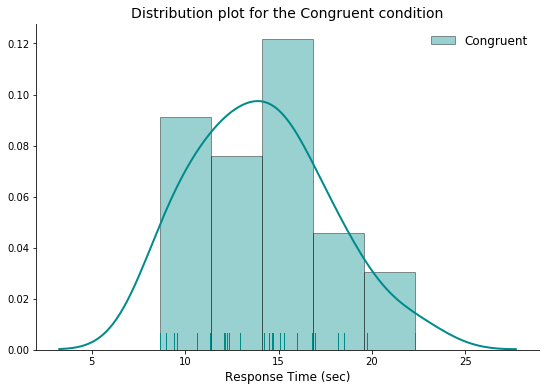

In [5]:
# Distribution plot for congruent condition
plt.figure(figsize=(9,6));
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)     
ax.spines["right"].set_visible(False)  

sns.distplot(df['Congruent'], rug=True, label="Congruent", color="darkcyan", hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2});

plt.xlabel("Response Time (sec)", fontsize=12);
plt.title("Distribution plot for the Congruent condition", fontsize=14);
plt.legend(frameon=False, fontsize=12);

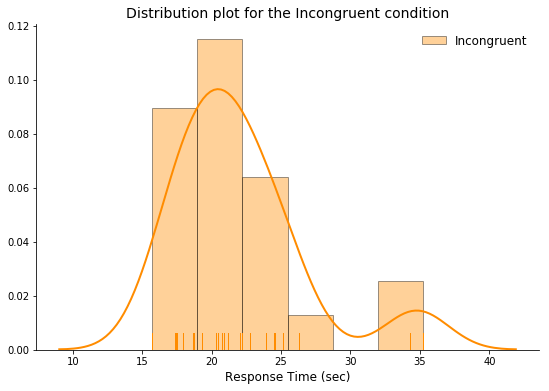

In [6]:
# Distribution plot for incongruent condition
plt.figure(figsize=(9,6));
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)     
ax.spines["right"].set_visible(False)    

sns.distplot(df['Incongruent'], rug=True, label="Incongruent", color="darkorange", hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2});

plt.xlabel("Response Time (sec)", fontsize=12);
plt.title("Distribution plot for the Incongruent condition", fontsize=14)
plt.legend(frameon=False, fontsize=12);

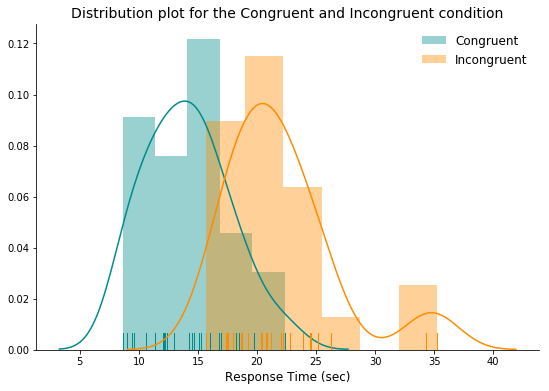

In [7]:
# Distribution plot for both congruent and incongruent condition
plt.figure(figsize=(9,6));
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)     
ax.spines["right"].set_visible(False)   

sns.distplot(df['Congruent'], rug=True, label="Congruent", color="darkcyan");
sns.distplot(df['Incongruent'], rug=True, label="Incongruent", color="darkorange");

plt.xlabel("Response Time (sec)", fontsize=12);
plt.title("Distribution plot for the Congruent and Incongruent condition", fontsize=14);
plt.legend(frameon=False, fontsize=12);

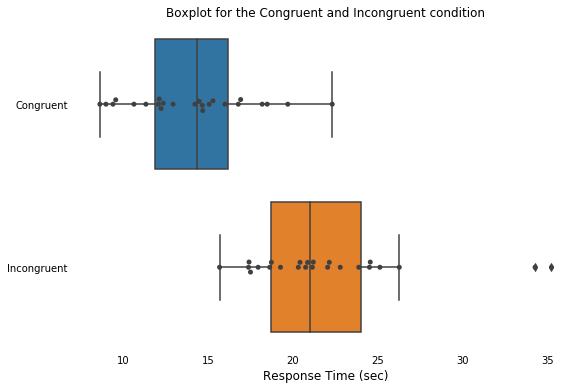

In [8]:
# Boxplot for both congruent and incongruent condition
plt.figure(figsize=(9,6));
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)

plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True)   

boxplot = sns.boxplot(data=df,orient="h");
sns.swarmplot(data=df,orient="h", color=".25")

plt.xlabel("Response Time (sec)", fontsize=12);
plt.title("Boxplot for the Congruent and Incongruent condition");

In [80]:
# Re-shape dataframe to ease plotting of bar chart
df_melted = df.reset_index()
df_melted = pd.melt(df_melted, id_vars="index", var_name="Condition", value_name="Response Time")
df_melted.sort_values(by=['index', 'Condition'], inplace=True)
df_melted = df_melted.reset_index(drop=True)
df_melted.head(5)

,index,Condition,Response Time
0,0,Congruent,12.079
1,0,Incongruent,19.278
2,1,Congruent,16.791
3,1,Incongruent,18.741
4,2,Congruent,9.564


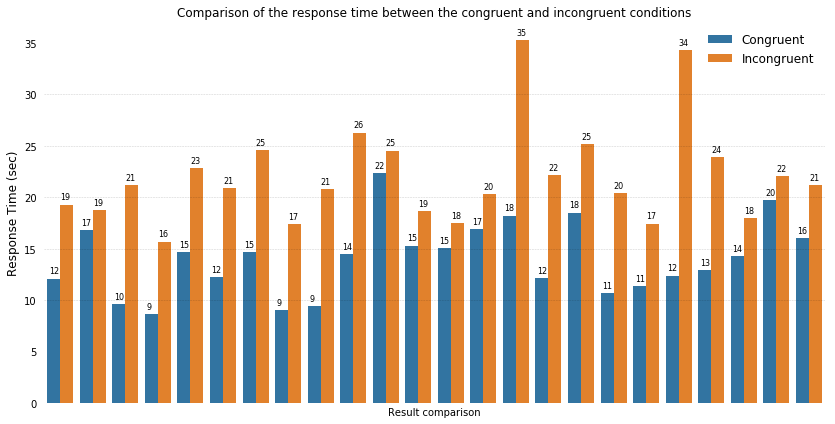

In [77]:
# Plot bar chart to compare results for congruent and incongruent conditions
plt.figure(figsize=(14,7));
ax = plt.subplot(111);
ax.spines["top"].set_visible(False);
ax.spines["right"].set_visible(False);
ax.spines["bottom"].set_visible(False);
ax.spines["left"].set_visible(False);

plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=False, left=False, right=False, labelleft=True);

for y in range(10, 35, 5):    
    plt.plot(range(-1, 25), [y] * len(range(-1, 25)), "--", lw=0.5, color="black", alpha=0.2)  

sns.barplot(x="index", y="Response Time", hue="Condition", data=df_melted);

for i in range(0, len(df_melted.index),2):
        plt.text(x = df_melted['index'][i]-0.35, y = df_melted['Response Time'][i]+0.5, s = int(round(df_melted['Response Time'][i])), size = 8)

for i in range(1, len(df_melted.index),2):
        plt.text(x = df_melted['index'][i], y = df_melted['Response Time'][i]+0.5, s = int(round(df_melted['Response Time'][i])), size = 8)

plt.ylabel("Response Time (sec)", fontsize=12);
plt.xlabel("Result comparison");
plt.title("Comparison of the response time between the congruent and incongruent conditions");
plt.legend(frameon=False, fontsize=12);

Looking at the above plots we can see that even though distributions partially overlap, there is a significant difference in the response time between the congruent and incongruent condition. For every single result, the response time for the incongruent condition is higher than for the congruent condition.

### Statistical test

In [99]:
import math 
from scipy.stats import t

In [106]:
# calculate t-critical value for 95% confidence level
t_critical = t.ppf(0.95, 23)
t_critical

1.7138715277470473

In [84]:
# calculate the mean value for both conditions
con_mean = df['Congruent'].mean()
incon_mean = df['Incongruent'].mean()

con_mean, incon_mean

(14.051124999999999, 22.015916666666666)

In [104]:
# calculate the point estimate: μ_incongruent -μ_congruent
point_est = incon_mean - con_mean
point_est

7.9647916666666667

In [89]:
# calculate standard deviation
stand_dev = (df['Congruent'] - df['Incongruent']).std()
stand_dev

4.8648269103590556

In [103]:
# calculate t-statistic
t_stat = point_est / (stand_dev / math.sqrt(len(df)))
t_stat

8.020706944109957

In [107]:
# compare t-statistic to t-critical value
t_stat > t_critical

True

### Conslusions

T-statistic of **8.02** is greater than the critical value of **1.71**, therefore, we can reject Null Hypothesis (H0), which states that `μ_congruent = μ_incongruent`. Alternative Hypothesis can be accepted.

Resources:

* [Histograms and Density Plots in Python, William Koehrsen, Medium](https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0)
* [How to make beautiful data visualizations in Python with matplotlib, Randy Olson](http://www.randalolson.com/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/)
* [Barplot with number of observation, The python graph gallery](https://python-graph-gallery.com/10-barplot-with-number-of-observation/)
* [Python function to get the t-statistic, Stackoverflow](https://stackoverflow.com/questions/19339305/python-function-to-get-the-t-statistic)